Mia Sowder

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # matplolib pyplot module as "plt"
import seaborn as sns             # seaborn as "sns"
import sqlite3



# Function to store sentiments of the sentence from a comments table
def comment_sentiment_scores(sentence, table):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    cur.execute(f"""
    UPDATE {table}
    SET comment_vader_negative_sentiment = ?, 
        comment_vader_neutral_sentiment = ?, 
        comment_vader_positive_sentiment = ?, 
        comment_vader_compound_sentiment = ?
    WHERE comment_body = ?
    """, 
    (sentiment_dict['neg'], 
     sentiment_dict['neu'], 
     sentiment_dict['pos'], 
     sentiment_dict['compound'], 
     sentence))
    
    conn.commit() 

# Function to store sentiments of the sentence from posts table
def post_sentiment_scores(post_title, post_body, table):

    sentence = post_title + post_body    
    
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    cur.execute(f"""
    UPDATE {table}
    SET post_vader_negative_sentiment = ?, 
        post_vader_neutral_sentiment = ?, 
        post_vader_positive_sentiment = ?, 
        post_vader_compound_sentiment = ?
    WHERE post_body = ?
    """, 
    (sentiment_dict['neg'], 
     sentiment_dict['neu'], 
     sentiment_dict['pos'], 
     sentiment_dict['compound'], 
     post_body ))
    
    conn.commit() 
    
# Driver code to test the function
if __name__ == "__main__" :
    
    with sqlite3.connect('raam_database.db') as conn:
        cur = conn.cursor()
        tables = ["nursing_comments", "nursing_posts", 
                  "teaching_comments", "teaching_posts",
                  "health_anxiety_comments", "health_anxiety_posts"]
        for table in tables:
            table_type = table.split('_')
            table_type = table_type[-1]
            
            df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
            
            for index, row in df.iterrows():
                if table_type == "comments":
                    sentence = row[3]
                    comment_sentiment_scores(sentence, table)
                elif table_type == "posts":
                    post_title = row[3]
                    post_body = row[4]
                    post_sentiment_scores(post_title, post_body, table)
                else:
                    raise "ERROR fetching table type"
                

/var/folders/hr/wd6z7xjs1cv5v4pw0v06v7vm0000gn/T/ipykernel_14347/2229840853.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sentence = row[3]
/var/folders/hr/wd6z7xjs1cv5v4pw0v06v7vm0000gn/T/ipykernel_14347/2229840853.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  post_title = row[3]
/var/folders/hr/wd6z7xjs1cv5v4pw0v06v7vm0000gn/T/ipykernel_14347/2229840853.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  post_body =

In [45]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect('raam_database.db')

cur.execute(f"""
    select avg(comment_vader_compound_sentiment)
    from teaching_comments
    """).fetchall()

# cur.execute(f"""
#     select avg(comment_vader_compound_sentiment), max(comment_vader_compound_sentiment), min(comment_vader_compound_sentiment)
#     from teaching_comments
#     """).fetchall()

# cur.execute(f"""
#     select avg(comment_vader_compound_sentiment), max(comment_vader_compound_sentiment), min(comment_vader_compound_sentiment)
#     from health_anxiety_comments
#     """).fetchall()

[(0.197996722306525,)]

In [32]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect('raam_database.db')

# Read data into a Pandas DataFrame
df = pd.read_sql_query("""SELECT * FROM nursing_comments
                       --WHERE comment_vader_compound_sentiment > 0.05
                       --OR comment_vader_compound_sentiment < -0.05
                       """
                       ,conn)

# Close the connection
conn.close()


,post_title,comment_username,comment_body,comment_score,comment_timestamp
0,My school has paid for a huge abstract art ins...,AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2021-06-02T20:17:02+00:00
1,Why is it the teacher’s responsibility to call...,AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2020-10-21T22:34:03+00:00
2,Dear students,AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2020-10-28T21:51:30+00:00
3,Science class: ‘What can we infer about Mrs. T...,AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2020-09-21T17:10:46+00:00
4,"""These 13 year olds were their own bosses for ...",AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2022-02-15T22:44:27+00:00
5,It begins,Anonymous,[deleted],Unknown,2020-09-08T17:13:50+00:00
6,It begins,Anonymous,[deleted],Unknown,2020-09-08T12:13:20+00:00
7,Some News!,Anonymous,[deleted],Unknown,2020-08-06T07:24:41+00:00
8,Some News!,AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2020-08-05T23:35:03+00:00
9,Today I was assaulted,AutoModerator,Welcome to /r/teaching. Please remember the ru...,Unknown,2021-10-26T00:19:26+00:00


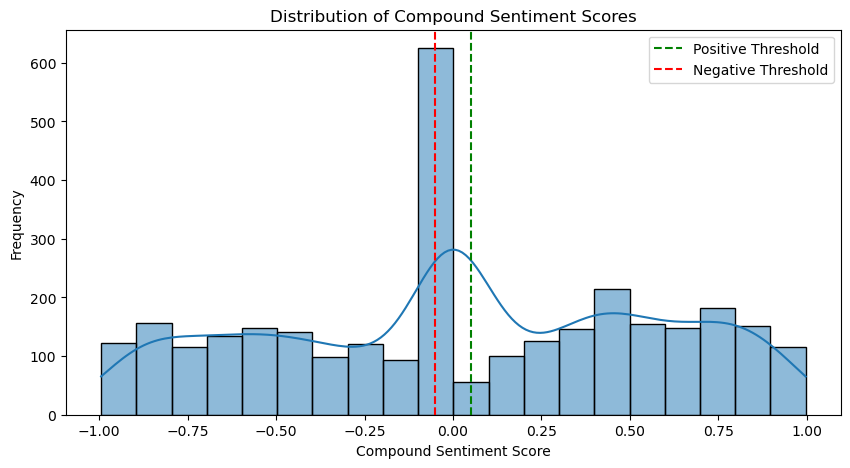

In [23]:
#Sentiment Score Distribution (Histogram)

plt.figure(figsize=(10, 5))
sns.histplot(df['comment_vader_compound_sentiment'], bins=20, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.legend()
plt.show()

/var/folders/hr/wd6z7xjs1cv5v4pw0v06v7vm0000gn/T/ipykernel_14347/72693301.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Sentiment Type', y='Sentiment Score', estimator=sum, ci=None)


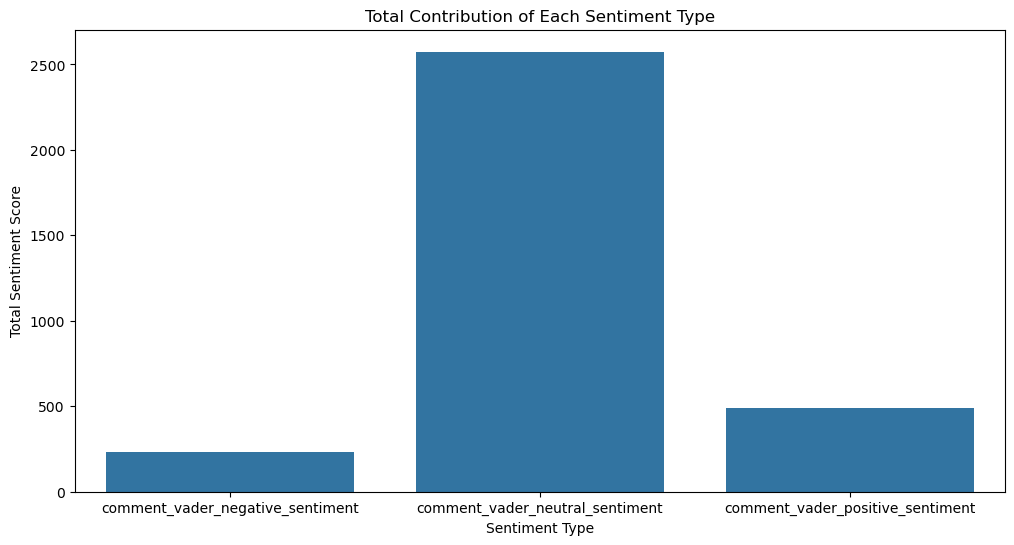

In [4]:
#Sentiment Breakdown (Stacked Bar Plot)

df_melted = df.melt(id_vars=['comment_id'], 
                     value_vars=['comment_vader_negative_sentiment', 
                                 'comment_vader_neutral_sentiment', 
                                 'comment_vader_positive_sentiment'],
                     var_name="Sentiment Type",
                     value_name="Sentiment Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Sentiment Type', y='Sentiment Score', estimator=sum, ci=None)
plt.ylabel('Total Sentiment Score')
plt.title('Total Contribution of Each Sentiment Type')
plt.show()

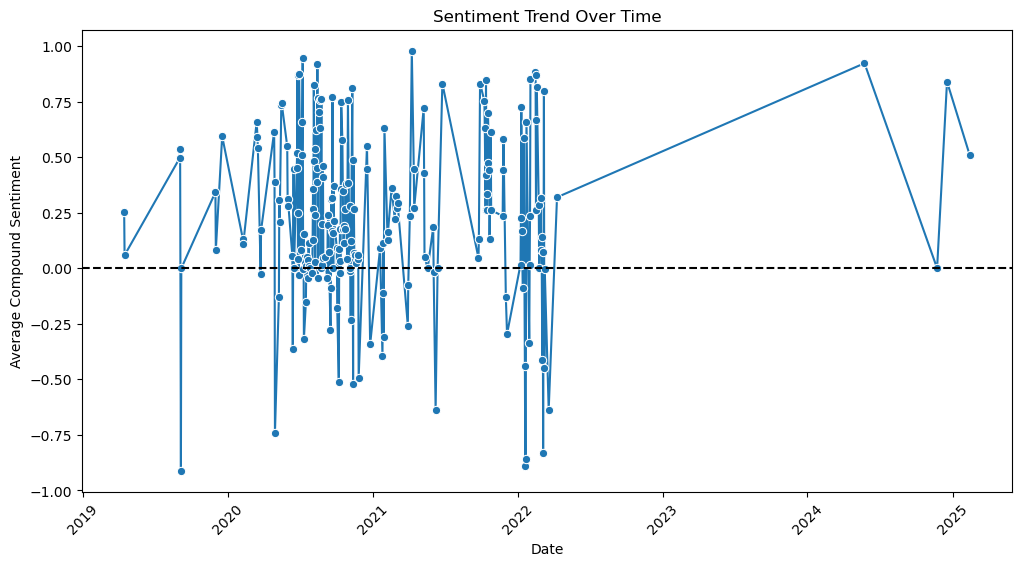

In [5]:
#Sentiment Trends Over Time

# Convert timestamp to datetime format
df['comment_timestamp'] = pd.to_datetime(df['comment_timestamp'])

# Aggregate sentiment over time
df_time = df.groupby(df['comment_timestamp'].dt.date)['comment_vader_compound_sentiment'].mean().reset_index()

# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='comment_timestamp', y='comment_vader_compound_sentiment', marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.show()

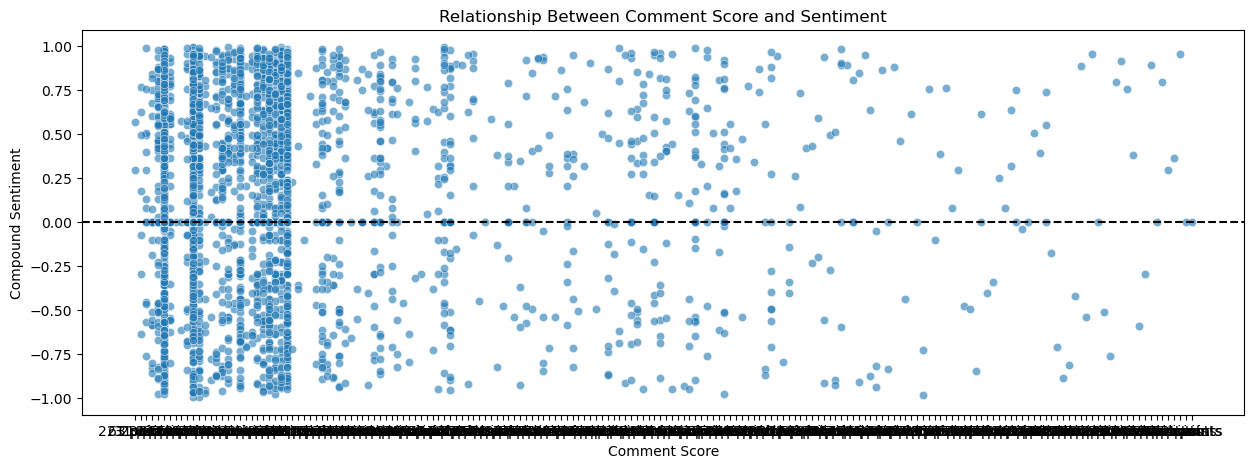

In [7]:
#Comment Score vs. Sentiment (Scatter Plot)

plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='comment_score', y='comment_vader_compound_sentiment', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Comment Score')
plt.ylabel('Compound Sentiment')
plt.title('Relationship Between Comment Score and Sentiment')
plt.show()

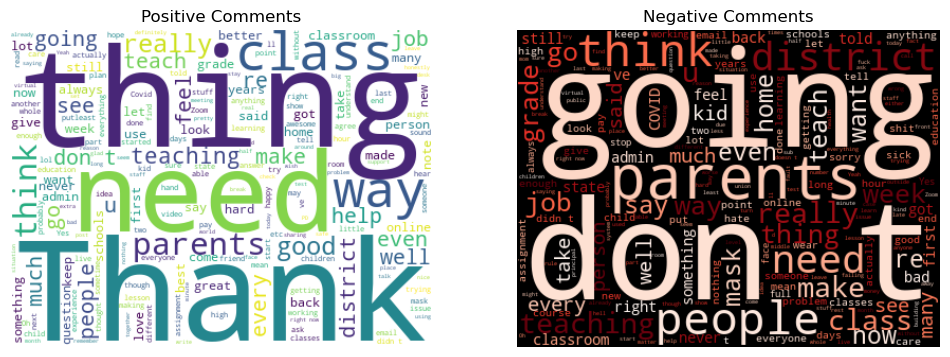

In [17]:
# Word Clouds for Positive and Negative Sentiments

from wordcloud import WordCloud, STOPWORDS

# Define words to exclude
custom_stopwords = set(STOPWORDS)  # Default stopwords in WordCloud
custom_stopwords.update(["student", "teacher", "work", "kids", "school", 
                         "students", "teachers", "s", "day", "one", "year"
                         , "will", "time", "parent", "know", "m"])  # Add custom words

# Separate positive and negative comments
positive_comments = " ".join(df[df['comment_vader_compound_sentiment'] > 0.05]['comment_body'])
negative_comments = " ".join(df[df['comment_vader_compound_sentiment'] < -0.05]['comment_body'])

# Generate word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=400, height=300, background_color='white', stopwords=custom_stopwords).generate(positive_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Comments")

plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=400, height=300, background_color='black', colormap='Reds', stopwords=custom_stopwords).generate(negative_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt   # matplotlib pyplot module as "plt"

# Database connection
DB_PATH = "raam_database.db"  # Update with your actual database path

def compute_score(subreddit, data_type):
    '''
    Compute the monthly mean anxiety scores for posts or comments from a given subreddit.

    Inputs:
      subreddit (str): name of the subreddit
      data_type (str): 'posts' or 'comments'
    
    Output: a dataframe with the mean anxiety scores by month
    '''
    # Connect to the database
    conn = sqlite3.connect(DB_PATH)

    # Define the SQL queries to get the relevant data
    if data_type == 'posts':
        query_time = f"""
        SELECT post_id, timestamp FROM '{subreddit}'
        """
        query_liwc = f"""
        SELECT post_id, post_vader_compound_sentiment FROM '{subreddit}'
        """
    elif data_type == "comments":
        query_time = f"""
        SELECT comment_id, comment_timestamp FROM comments WHERE subreddit = '{subreddit}'
        """
        query_liwc = f"""
        SELECT comment_id, comment_vader_compound_sentiment FROM '{subreddit}'
        """

    # Load data into Pandas DataFrames
    df_time = pd.read_sql_query(query_time, conn)
    df_liwc = pd.read_sql_query(query_liwc, conn)

    # Close the connection
    conn.close()

    # Merge datasets on their respective ID columns
    id_column = "post_id" if data_type == "posts" else "comment_id"
    df_merged = df_liwc.merge(df_time, on=id_column, how='inner')

    # Convert timestamps to datetime
    timestamp_col = "timestamp" if data_type == "posts" else "comment_timestamp"
    df_merged['datetime'] = pd.to_datetime(df_merged[timestamp_col])

    # Extract year and month
    df_merged['Year'] = df_merged['datetime'].dt.year
    df_merged['Month'] = df_merged['datetime'].dt.month

    # Group by year and month and calculate the mean score
    df_score = df_merged.groupby(['Year', 'Month'])['emo_anx'].mean().reset_index()

    # Filter out unwanted years (if needed)
    df_score = df_score[df_score['Year'] != 2018].reset_index(drop=True)

    return df_score

def get_mean_score(posts_score, comments_score):
    '''
    Get the monthly mean anxiety scores across the posts and comments from a given subreddit.

    Inputs:
      posts_score (DataFrame): DataFrame with monthly scores for posts
      comments_score (DataFrame): DataFrame with monthly scores for comments
    
    Output: a DataFrame with monthly mean scores
    '''
    # Merge the dataframes on Year and Month
    df_merged = pd.merge(posts_score, comments_score, on=['Year', 'Month'], how='inner', suffixes=('_post', '_comment'))

    # Calculate the mean score
    df_merged['emo_anx_mean'] = df_merged[['emo_anx_post', 'emo_anx_comment']].mean(axis=1)

    # Add a Date column for plotting
    df_merged['Date'] = pd.to_datetime(df_merged[['Year', 'Month']].assign(day=1))

    return df_merged

def plot_mean_scores(subreddit):
    '''
    Plot the monthly mean anxiety scores for a given subreddit.

    Inputs:
      subreddit (str): name of the subreddit
    '''
    mean_scores = get_mean_score(compute_score(subreddit, 'posts'), compute_score(subreddit, 'comments'))

    # Generate the plot
    plt.figure(figsize=(10, 5))
    plt.plot(mean_scores['Date'], mean_scores['emo_anx_mean'], marker='o', linestyle='-', color='b', label='Score')
    
    # Format the plot
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.title(f'LIWC Mean Anxiety Scores by Month for {subreddit}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Generate a plot for the "health_anxiety" subreddit
plot_mean_scores('health_anxiety')


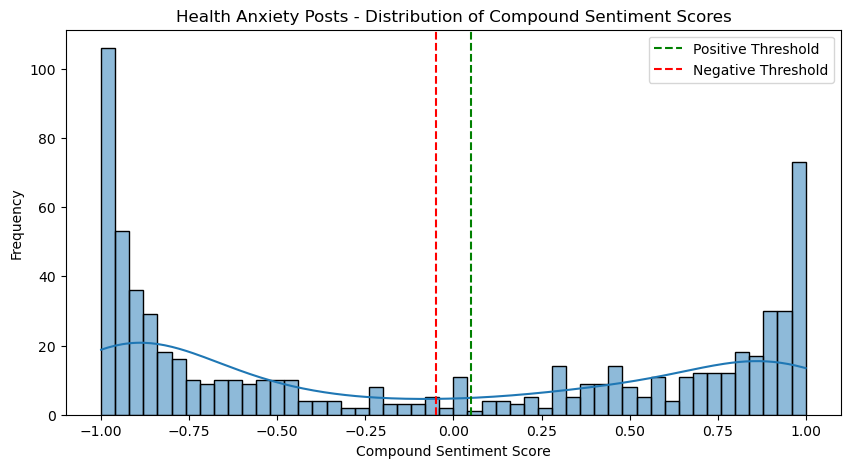

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('raam_database.db')
df = pd.read_sql_query("""SELECT * FROM health_anxiety_posts
                       """
                       ,conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.histplot(df['post_vader_compound_sentiment'], bins=50, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Health Anxiety Posts - Distribution of Compound Sentiment Scores')
plt.legend()
plt.show()

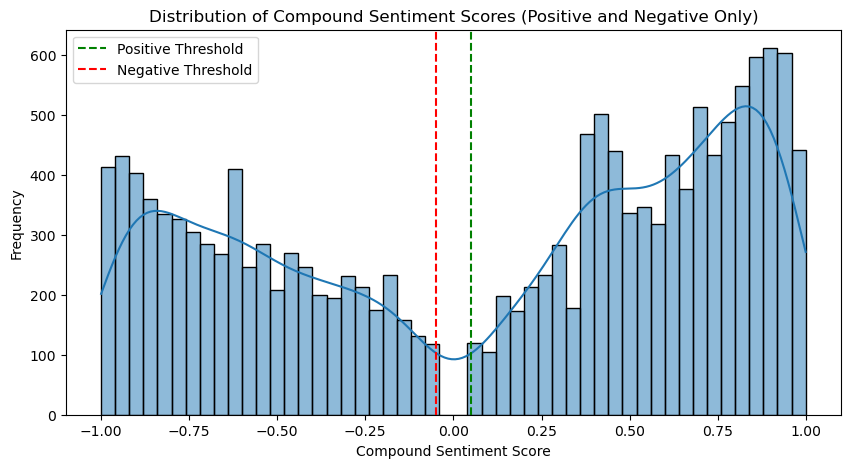

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('raam_database.db')
df = pd.read_sql_query("""SELECT * FROM health_anxiety_comments
                       WHERE comment_vader_compound_sentiment > 0.05
                       OR comment_vader_compound_sentiment < -0.05
                       """
                       ,conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.histplot(df['comment_vader_compound_sentiment'], bins=50, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores (Positive and Negative Only)')
plt.legend()
plt.show()


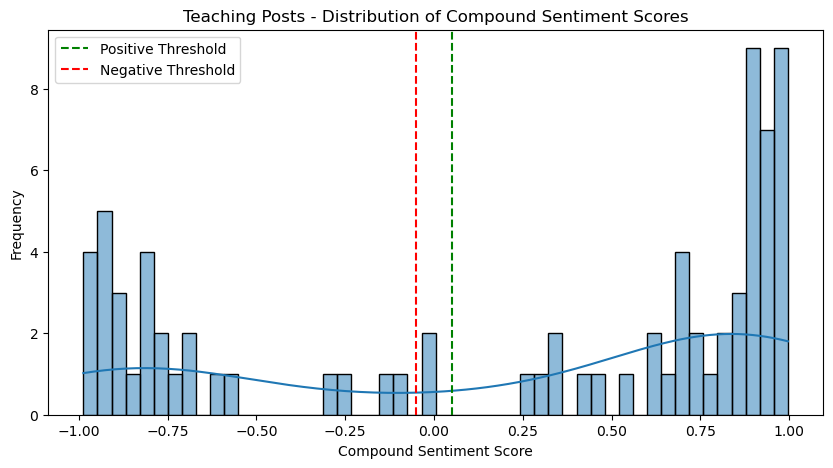

In [3]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('raam_database.db')
df = pd.read_sql_query("""SELECT * FROM teaching_posts
                       """
                       ,conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.histplot(df['post_vader_compound_sentiment'], bins=50, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Teaching Posts - Distribution of Compound Sentiment Scores')
plt.legend()
plt.show()

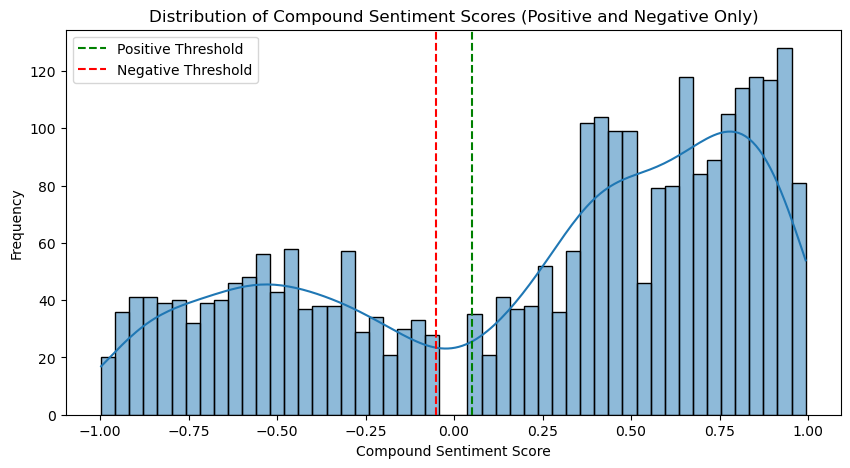

In [4]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('raam_database.db')
df = pd.read_sql_query("""SELECT * FROM teaching_comments
                       WHERE comment_vader_compound_sentiment > 0.05
                       OR comment_vader_compound_sentiment < -0.05
                       """
                       ,conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.histplot(df['comment_vader_compound_sentiment'], bins=50, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores (Positive and Negative Only)')
plt.legend()
plt.show()


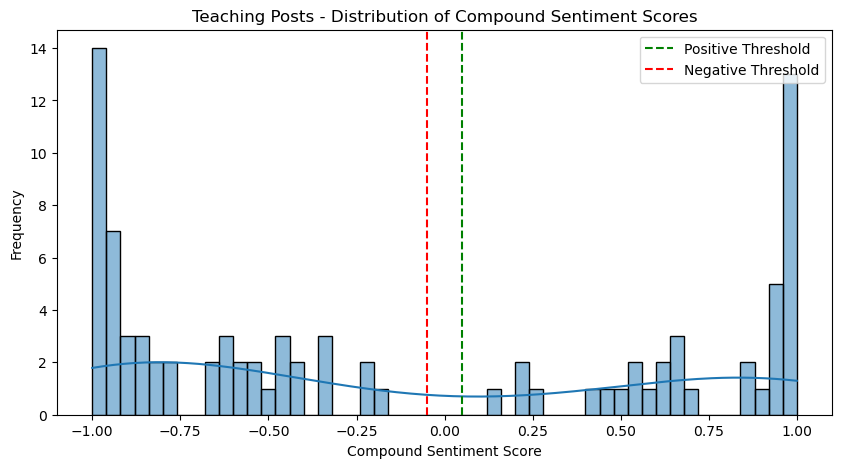

In [6]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('raam_database.db')
df = pd.read_sql_query("""SELECT * FROM nursing_posts
                       """
                       ,conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.histplot(df['post_vader_compound_sentiment'], bins=50, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Teaching Posts - Distribution of Compound Sentiment Scores')
plt.legend()
plt.show()

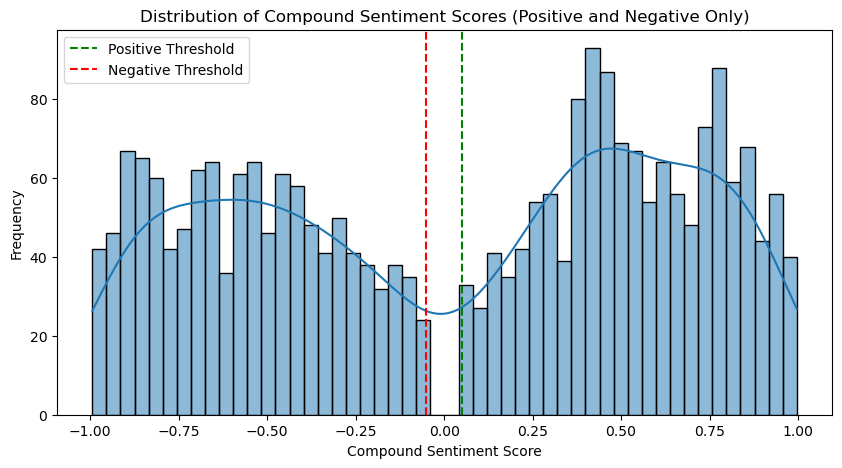

In [5]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('raam_database.db')
df = pd.read_sql_query("""SELECT * FROM nursing_comments
                       WHERE comment_vader_compound_sentiment > 0.05
                       OR comment_vader_compound_sentiment < -0.05
                       """
                       ,conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.histplot(df['comment_vader_compound_sentiment'], bins=50, kde=True)
plt.axvline(0.05, color='g', linestyle='--', label="Positive Threshold")
plt.axvline(-0.05, color='r', linestyle='--', label="Negative Threshold")
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores (Positive and Negative Only)')
plt.legend()
plt.show()


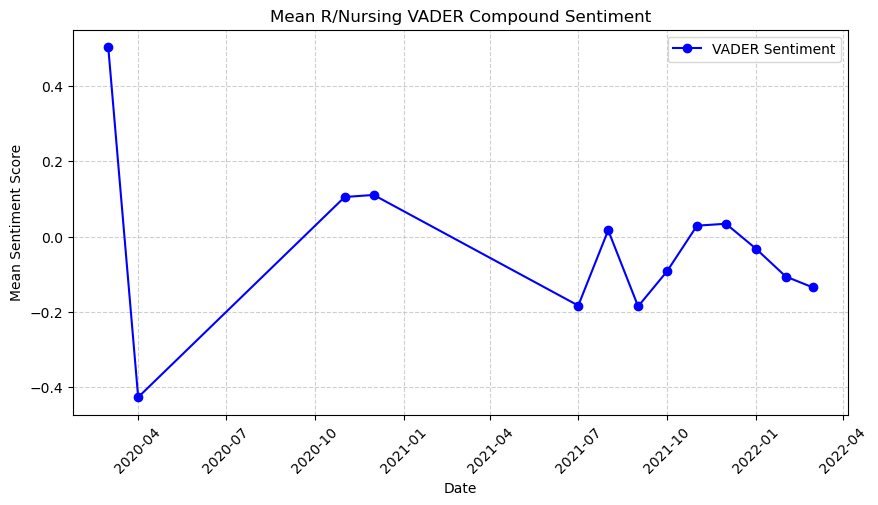

In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Database path (update if needed)
DB_PATH = "raam_database.db"

def compute_score(data_type):
    '''
    Compute the monthly mean sentiment scores for posts or comments.

    Inputs:
      data_type (str): 'posts' or 'comments'
    
    Output: a dataframe with the mean Vader compound sentiment scores by month
    '''
    # Connect to SQLite database
    conn = sqlite3.connect(DB_PATH)

    # Define SQL queries
    if data_type == 'posts':
        query = """
        SELECT post_id, timestamp, post_vader_compound_sentiment AS vader_compound_sentiment
        FROM nursing_posts
        """
    elif data_type == "comments":
        query = """
        SELECT post_id, comment_id, comment_timestamp AS timestamp, comment_vader_compound_sentiment AS vader_compound_sentiment
        FROM nursing_comments
        """

    # Read data into DataFrame
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Convert timestamp to datetime
    df['datetime'] = pd.to_datetime(df['timestamp'])
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month

    # Group by year and month, then calculate mean sentiment score
    df_score = df.groupby(['Year', 'Month'])['vader_compound_sentiment'].mean().reset_index()

    return df_score

def get_mean_score(posts_score, comments_score):
    '''
    Merge and calculate the monthly mean sentiment scores across posts and comments.

    Inputs:
      posts_score (DataFrame): Monthly scores for posts
      comments_score (DataFrame): Monthly scores for comments
    
    Output: a DataFrame with monthly mean scores
    '''
    # Merge posts and comments on Year and Month
    df_merged = pd.merge(posts_score, comments_score, on=['Year', 'Month'], how='inner', suffixes=('_post', '_comment'))

    # Calculate the mean sentiment score across posts and comments
    df_merged['vader_compound_mean'] = df_merged[['vader_compound_sentiment_post', 'vader_compound_sentiment_comment']].mean(axis=1)

    # Add a date column for plotting
    df_merged['Date'] = pd.to_datetime(df_merged[['Year', 'Month']].assign(day=1))

    return df_merged

def plot_mean_scores():
    '''
    Plot the monthly mean sentiment scores.
    '''
    mean_scores = get_mean_score(compute_score('posts'), compute_score('comments'))

    # Generate the plot
    plt.figure(figsize=(10, 5))
    plt.plot(mean_scores['Date'], mean_scores['vader_compound_mean'], marker='o', linestyle='-', color='b', label='VADER Sentiment')

    # Format the plot
    plt.xlabel('Date')
    plt.ylabel('Mean Sentiment Score')
    plt.title('Mean R/Nursing VADER Compound Sentiment')
    plt.xticks(rotation=45)  
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Generate the plot
plot_mean_scores()

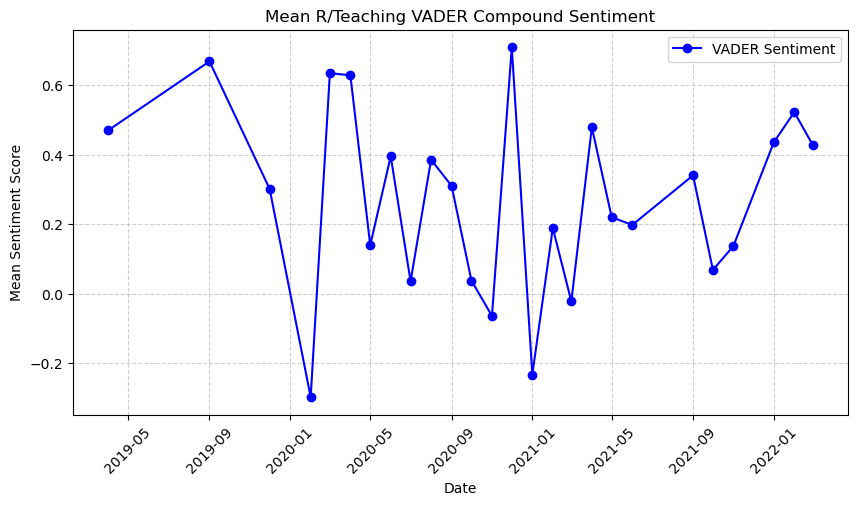

In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Database path (update if needed)
DB_PATH = "raam_database.db"

def compute_score(data_type):
    '''
    Compute the monthly mean sentiment scores for posts or comments.

    Inputs:
      data_type (str): 'posts' or 'comments'
    
    Output: a dataframe with the mean Vader compound sentiment scores by month
    '''
    # Connect to SQLite database
    conn = sqlite3.connect(DB_PATH)

    # Define SQL queries
    if data_type == 'posts':
        query = """
        SELECT post_id, timestamp, post_vader_compound_sentiment AS vader_compound_sentiment
        FROM teaching_posts
        """
    elif data_type == "comments":
        query = """
        SELECT post_id, comment_id, comment_timestamp AS timestamp, comment_vader_compound_sentiment AS vader_compound_sentiment
        FROM teaching_comments
        """

    # Read data into DataFrame
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Convert timestamp to datetime
    df['datetime'] = pd.to_datetime(df['timestamp'])
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month

    # Group by year and month, then calculate mean sentiment score
    df_score = df.groupby(['Year', 'Month'])['vader_compound_sentiment'].mean().reset_index()

    return df_score

def get_mean_score(posts_score, comments_score):
    '''
    Merge and calculate the monthly mean sentiment scores across posts and comments.

    Inputs:
      posts_score (DataFrame): Monthly scores for posts
      comments_score (DataFrame): Monthly scores for comments
    
    Output: a DataFrame with monthly mean scores
    '''
    # Merge posts and comments on Year and Month
    df_merged = pd.merge(posts_score, comments_score, on=['Year', 'Month'], how='inner', suffixes=('_post', '_comment'))

    # Calculate the mean sentiment score across posts and comments
    df_merged['vader_compound_mean'] = df_merged[['vader_compound_sentiment_post', 'vader_compound_sentiment_comment']].mean(axis=1)

    # Add a date column for plotting
    df_merged['Date'] = pd.to_datetime(df_merged[['Year', 'Month']].assign(day=1))

    return df_merged

def plot_mean_scores():
    '''
    Plot the monthly mean sentiment scores.
    '''
    mean_scores = get_mean_score(compute_score('posts'), compute_score('comments'))

    # Generate the plot
    plt.figure(figsize=(10, 5))
    plt.plot(mean_scores['Date'], mean_scores['vader_compound_mean'], marker='o', linestyle='-', color='b', label='VADER Sentiment')

    # Format the plot
    plt.xlabel('Date')
    plt.ylabel('Mean Sentiment Score')
    plt.title('Mean R/Teaching VADER Compound Sentiment')
    plt.xticks(rotation=45)  
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Generate the plot
plot_mean_scores()

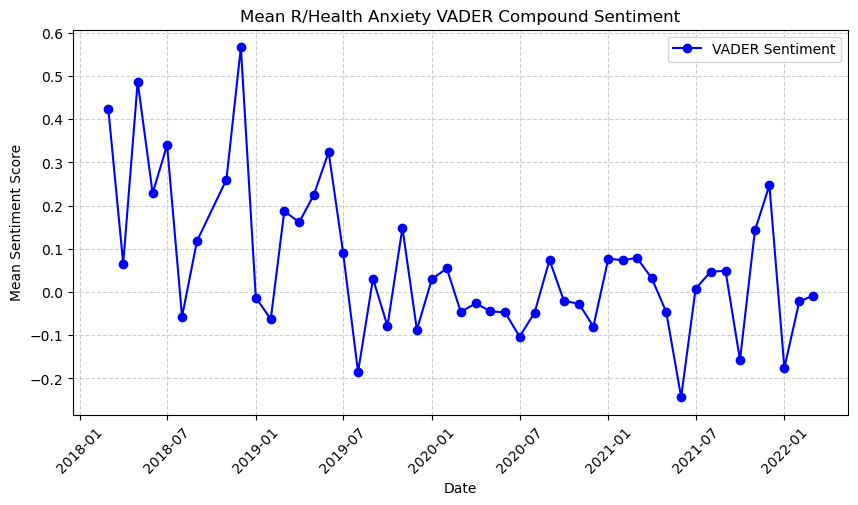

In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Database path (update if needed)
DB_PATH = "raam_database.db"

def compute_score(data_type):
    '''
    Compute the monthly mean sentiment scores for posts or comments.

    Inputs:
      data_type (str): 'posts' or 'comments'
    
    Output: a dataframe with the mean Vader compound sentiment scores by month
    '''
    # Connect to SQLite database
    conn = sqlite3.connect(DB_PATH)

    # Define SQL queries
    if data_type == 'posts':
        query = """
        SELECT post_id, timestamp, post_vader_compound_sentiment AS vader_compound_sentiment
        FROM health_anxiety_posts
        """
    elif data_type == "comments":
        query = """
        SELECT post_id, comment_id, comment_timestamp AS timestamp, comment_vader_compound_sentiment AS vader_compound_sentiment
        FROM health_anxiety_comments
        """

    # Read data into DataFrame
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Convert timestamp to datetime
    df['datetime'] = pd.to_datetime(df['timestamp'])
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month

    # Group by year and month, then calculate mean sentiment score
    df_score = df.groupby(['Year', 'Month'])['vader_compound_sentiment'].mean().reset_index()

    return df_score

def get_mean_score(posts_score, comments_score):
    '''
    Merge and calculate the monthly mean sentiment scores across posts and comments.

    Inputs:
      posts_score (DataFrame): Monthly scores for posts
      comments_score (DataFrame): Monthly scores for comments
    
    Output: a DataFrame with monthly mean scores
    '''
    # Merge posts and comments on Year and Month
    df_merged = pd.merge(posts_score, comments_score, on=['Year', 'Month'], how='inner', suffixes=('_post', '_comment'))

    # Calculate the mean sentiment score across posts and comments
    df_merged['vader_compound_mean'] = df_merged[['vader_compound_sentiment_post', 'vader_compound_sentiment_comment']].mean(axis=1)

    # Add a date column for plotting
    df_merged['Date'] = pd.to_datetime(df_merged[['Year', 'Month']].assign(day=1))

    return df_merged

def plot_mean_scores():
    '''
    Plot the monthly mean sentiment scores.
    '''
    mean_scores = get_mean_score(compute_score('posts'), compute_score('comments'))

    # Generate the plot
    plt.figure(figsize=(10, 5))
    plt.plot(mean_scores['Date'], mean_scores['vader_compound_mean'], marker='o', linestyle='-', color='b', label='VADER Sentiment')

    # Format the plot
    plt.xlabel('Date')
    plt.ylabel('Mean Sentiment Score')
    plt.title('Mean R/Health Anxiety VADER Compound Sentiment')
    plt.xticks(rotation=45)  
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Generate the plot
plot_mean_scores()